## STEP 1: Load and Filter data

For this analysis, we want to look only at a relevent range of years and only years that are in teh past.  So, let's first take a look at the data between 1986 and 2014 (inclusive of those dates).

At the end of this step, you should have a data frame loaded from the condemnations file and filtered down to only the data between 1986 and 2014.  Put that into a dataframe named `condemnations`

**Some helpful notes:**
* Use the columns `InspectDate` to filter this date range

In [1]:
%matplotlib inline
import pandas as pd

condemnations = pd.DataFrame()
data = pd.read_csv('/data/condemn.txt')
display(data.shape)
display(data.head(10))
#display(data.describe())
display(data.columns)
data['InspectDate'] = data['InspectDate'].str[0:4]
display(data['InspectDate'])
condemnations = data[(data['InspectDate'] >= '1986') & (data['InspectDate'] <= '2014')]
display(condemnations.shape)
display(condemnations['Status'])

/opt/tljh/user/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (2,8,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(32586, 40)

,AcctNum,PrclErr,AddrAdjusted,CityBlock,Parcel,OwnerCode,Handle,Parcel9,AddrNum,AddrSuf,...,CensBlock00,AsrNbrhd,ImpactCode,NLC,Parity,Inspector,Images,FirstDate,LastDate,UpDateGeo
0,1.0,0.0,False,3652.00,341.0,1.0,1.365200e+10,365200341.0,4049,,...,1114.4006,309.0,0.0,123.0,O,NaN,NaN,1987-08-07 00:00:00,2019-01-04 00:00:00,NaN
1,2.0,0.0,False,666.00,80.0,0.0,1.066600e+10,66600080.0,906,,...,1234.2003,248.0,0.0,104.0,E,NaN,NaN,1988-06-28 00:00:00,2019-01-04 00:00:00,NaN
2,3.0,0.0,False,3913.01,120.0,1.0,1.391301e+10,391301120.0,4218,,...,1191.1004,230.0,0.0,210.0,E,NaN,NaN,1990-08-28 00:00:00,2019-01-04 00:00:00,NaN
3,4.0,2.0,False,3744.00,145.0,0.0,1.374400e+10,374400145.0,4145,,...,1111.4000,231.0,0.0,92.0,O,NaN,NaN,1990-06-12 00:00:00,2019-01-04 00:00:00,NaN
4,5.0,0.0,False,1103.00,30.0,0.0,1.110300e+10,110300030.0,1936,,...,1266.5001,318.0,0.0,5.0,E,NaN,NaN,2006-12-21 00:00:00,2019-01-04 00:00:00,NaN
5,6.0,0.0,False,5277.00,560.0,0.0,1.527700e+10,527700560.0,937,,...,1083.2005,334.0,0.0,806.0,O,NaN,NaN,2006-12-20 00:00:00,2019-01-04 00:00:00,NaN
6,7.0,0.0,False,1532.00,90.0,0.0,1.153200e+10,153200090.0,3312,,...,1243.4003,146.0,0.0,247.0,E,NaN,NaN,2006-12-20 00:00:00,2019-01-04 00:00:00,NaN
7,8.0,0.0,True,5441.00,195.0,0.0,1.544100e+10,544100195.0,4001,03,...,1172.1004,220.0,0.0,11.0,O,NaN,NaN,1991-05-17 00:00:00,2019-01-04 00:00:00,NaN
8,9.0,18.0,True,4256.00,195.0,7.0,1.425600e+10,425600195.0,8100,04,...,1085.1002,336.0,0.0,16.0,E,NaN,NaN,1987-10-13 00:00:00,2019-01-04 00:00:00,NaN
9,10.0,87.0,False,3643.00,360.0,0.0,1.364300e+10,364300360.0,3929,,...,1114.2001,309.0,0.0,123.0,O,NaN,NaN,2006-12-20 00:00:00,2019-01-04 00:00:00,NaN


Index(['AcctNum', 'PrclErr', 'AddrAdjusted', 'CityBlock', 'Parcel',
       'OwnerCode', 'Handle', 'Parcel9', 'AddrNum', 'AddrSuf', 'StDir',
       'StName', 'StType', 'InspectDate', 'InspectType', 'CondLetterSent',
       'Status', 'OwnerCompany', 'OwnerName', 'OwnerAddr', 'OwnerCity',
       'OwnerState', 'OwnerZIP', 'GeoCityBLockPart', 'Ward00', 'Precinct02',
       'Nbrhd', 'CDADist', 'CDASubDist', 'PoliceDist', 'CensBlock00',
       'AsrNbrhd', 'ImpactCode', 'NLC', 'Parity', 'Inspector', 'Images',
       'FirstDate', 'LastDate', 'UpDateGeo'],
      dtype='object')

0        1986
1        2009
2        2003
3        1996
4        2006
         ... 
32581    2014
32582    2013
32583    2015
32584    2016
32585    2013
Name: InspectDate, Length: 32586, dtype: object

(30232, 40)

0          W
1          B
2        NaN
3          W
4        NaN
        ... 
32575    NaN
32576    NaN
32581    NaN
32582    NaN
32585    NaN
Name: Status, Length: 30232, dtype: object

In [2]:
assert(condemnations.shape == (30232, 40))
assert(len(condemnations[condemnations['InspectDate'] < '1986'])==0)
assert(len(condemnations[condemnations['InspectDate'] >= '2015'])==0)

## STEP 2: Pivot and Summarize

In this step we want to pivot our data so that we have one row per year, a column for each value that appears in the `Status` column, and a count of how many condemnations occurred of each type in each year.  Put your summary pivot table into a variable called `by_year`.

**Some helpful notes:**
* For some reason, Pandas is just kind of stubborn about count being the aggregate function.  You may need to tell it to `np.ma.count` specifically.  I've imported Numpy as np for you.

In [3]:
import numpy as np

by_year = condemnations.groupby(['InspectDate', 'Status'])['AcctNum'].count().reset_index()
by_year.head()

,InspectDate,Status,AcctNum
0,1986,B,22
1,1986,L,12
2,1986,R,19
3,1986,W,112
4,1987,B,91


In [4]:
by_year = by_year.pivot(index='InspectDate', columns='Status', values='AcctNum')
by_year = by_year.fillna(0)
by_year.head()

Status,B,L,R,W
InspectDate,,,,
1986,22.0,12.0,19.0,112.0
1987,91.0,20.0,8.0,361.0
1988,215.0,16.0,15.0,297.0
1989,277.0,15.0,11.0,432.0
1990,119.0,29.0,8.0,322.0


In [5]:
by_year.shape

(29, 4)

In [6]:
assert(by_year.shape == (29, 4))
assert(list(by_year.columns) == ['B', 'L', 'R', 'W'])
assert(list(by_year.sum()) == [10572, 4966, 98, 9670])

In [7]:
by_year['R'][5:20]

InspectDate
1991    4.0
1992    4.0
1993    2.0
1994    5.0
1995    0.0
1996    0.0
1997    0.0
1998    0.0
1999    0.0
2000    0.0
2001    0.0
2002    0.0
2003    0.0
2004    0.0
2005    0.0
Name: R, dtype: float64

## STEP 3: Plot and see what you see

Use Pandas built-in plotting capabilities to visualize this information in way that you think makes sense.  It might be that plotting a simple multi-series line chart would give you some insights.  Show your plot in the cell below, then use the text cell below that to write a few sentences about what you see.


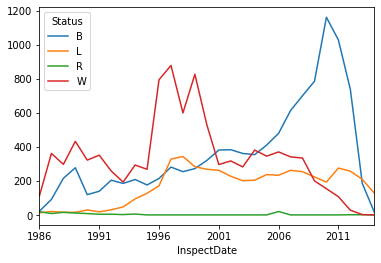

In [8]:
%matplotlib inline
by_year.plot()

One thing noted I noted was that there was a large number of NAN for the R category.  I replaced it with zero, therefore there are a small number in that category.  This could mean that something change in regards to the way things are classified or that this R status is not that prevelent or not documented.  Looking at the graph, with the drop in the R status all the others increased with W peaking in the late 90s; the L status increasing and the becoming stable; and the B status realy peaking in the late 2000s.  I would need to see more of what the policies were at these times as well as look at the number of total reviews.  It seems that there was a change effecting the status which occured arounr 1994-1996 and then again around 2006.  Just noting the events in the late 1990s, it could be related to the changes in hosing purchasing at the time.  In 2001, there was 9/11/  In 2006, there was the housing crash.  All of these events may have had some affect on the different statuses.

# PART 2 - Video Conference Usage

In this next part of the assignment, we'll be looking at how video conference usage has change for my company over the past couple of months.  This real data.  Please don't judge anyone based on the information here.  ;)

For the assignment, I want you to compare (by person) the number of meetings hosted by each user for the last two weeks of February and the last two weeks of March.  This might be a little complicated to think through HOW to do that, so the steps below are one approach.

1. Create a new column called startDate that contains just the day part of the startTime column in the data.  You can do that using datetime functions if you want, but you'll notice that the date in this file is a string formatted YYYY-MM-DD-HH:mm:ss, so it's probably easier just to pull out the first 10 characters of the string instead.  `meetings['startTime'].str[0:10]`
2. Create another new column.  This one should contain a label like "BEFORE" for the week 2/17 - 2/28 and "DURING" for the week of 3/16 - 3/27.  A hand tip on this is that you can set values for some rows in a data frame using `meetings.loc[row_filter,'Column Name'] = 'Value'` if you've created a `row_filter` as we discussed in prior weeks.
3. From here, using `pivot_table()` is one good way to summarize the information.

**FINAL RESULT**

For a final result, I'd like you to produce a data frame named **summary** that contains:
* One ROW for each userName.  The userName can either be the row index or a column in the data frame.
* One COLUMN for the "BEFORE" week and one COLUMN for the "DURING" week.  Name those columns 'Before' and 'During'.
* One more calculated column that shows the percent increase from BEFORE to DURING.  Name that column 'pctChange'.


In [9]:
import pandas as pd
summary = pd.DataFrame()
summary1 = pd.DataFrame()
meetings = pd.read_csv('/data/meetings.csv')
meetings.columns
meetings['startDate'] = meetings['startTime'].str[0:10]

display(meetings.columns)
meetings['startDate'] = pd.to_datetime(meetings['startDate'])
display(meetings.head(5))


Index(['meeting_uuid', 'meetingTitle', 'meetingId', 'userName', 'user_id',
       'user_tags', 'endTime', 'startTime', 'email', 'participantSeconds',
       'joinDate', 'joinWeek', 'joinMonth', 'participants',
       'participantMinutes', 'meetingDurationMinutes', 'popId', 'userType',
       'billable', 'moderatorLess', 'start_time', 'total_highlights_created',
       'smart_meeting', 'transcription_used',
       'total_transcription_duration_minutes', 'startDate'],
      dtype='object')

,meeting_uuid,meetingTitle,meetingId,userName,user_id,user_tags,endTime,startTime,email,participantSeconds,...,popId,userType,billable,moderatorLess,start_time,total_highlights_created,smart_meeting,transcription_used,total_transcription_duration_minutes,startDate
0,418897-3b9f0feb-f8f4-4ae7-9464-eb983c30af60,Review Payer Websites,681568231,chris.rogers.amitechsolutions,3180644,NaN,2020-03-31 22:21:35,2020-03-31 21:00:22,chris.rogers@amitechsolutions.com,19386,...,26,ENTERPRISE_PAID,True,True,2020-03-31 21:00:22.0,NaN,NaN,NaN,NaN,2020-03-31
1,418897-14587f14-faf0-4879-9756-fe335357b413,Drew's Meeting,258719784,Drew.Marco,2717893,NaN,2020-03-31 21:30:37,2020-03-31 20:58:41,Drew.Marco@AmitechSolutions.com,7242,...,25,ENTERPRISE_PAID,True,True,2020-03-31 20:58:41.0,NaN,NaN,NaN,NaN,2020-03-31
2,418897-aa82b3f0-e3df-456a-80d5-daef7902c232,St. Luke's Project Discussion,415828450,eric.keeney,2692908,NaN,2020-03-31 22:48:43,2020-03-31 20:57:51,eric.keeney@amitechsolutions.com,38469,...,25,ENTERPRISE_PAID,True,True,2020-03-31 20:57:51.0,NaN,NaN,NaN,NaN,2020-03-31
3,418867-f5fadea7-75f8-4860-9a1e-090805ff6346,Amit's Meeting,275007771,amit.bhagat,2756615,NaN,2020-03-31 21:02:28,2020-03-31 20:34:43,amit.bhagat@amitechsolutions.com,6394,...,110,ENTERPRISE_PAID,True,True,2020-03-31 20:34:43.0,NaN,NaN,NaN,NaN,2020-03-31
4,418894-3a911019-1a97-4058-8bd4-035245c73bda,Andrea's Meeting,791412043,andrea.bryant.amitechsolutions,2673353,NaN,2020-03-31 20:49:46,2020-03-31 20:30:02,hr-dept@amitechsolutions.com,3363,...,25,ENTERPRISE_PAID,True,True,2020-03-31 20:30:02.0,NaN,NaN,NaN,NaN,2020-03-31


In [10]:
meetings = meetings.drop(['meeting_uuid', 'meetingTitle', 'meetingId','user_id', 'user_tags','email','joinDate', 'joinWeek', 'joinMonth', 'participants', 'participantMinutes', 'meetingDurationMinutes', 'popId', 'userType',
       'billable', 'moderatorLess', 'start_time', 'total_highlights_created','smart_meeting', 'transcription_used', 'total_transcription_duration_minutes',], axis=1)

In [11]:
meetings['Period'] = ''
before = (meetings['startDate'] >= '2020-02-17') & (meetings['startDate'] <= '2020-02-28')
during = (meetings['startDate'] >= '2020-03-16') & (meetings['startDate'] <= '2020-03-27')

meetings.loc[before, 'Period'] = 'BEFORE'
meetings.loc[during, 'Period'] = 'DURING'


In [12]:
meetings = meetings[before | during]
display(meetings.head())
meetings['Period'].value_counts()

,userName,endTime,startTime,participantSeconds,startDate,Period
59,angie.warren,2020-03-27 22:21:52,2020-03-27 22:00:23,2513,2020-03-27,DURING
60,Drew.Marco,2020-03-27 21:20:28,2020-03-27 20:58:29,4816,2020-03-27,DURING
61,paul.boal,2020-03-27 20:51:13,2020-03-27 20:29:51,2122,2020-03-27,DURING
62,shawn.reilly.amitechsolutions,2020-03-27 21:21:35,2020-03-27 19:56:12,17513,2020-03-27,DURING
63,amit.bhagat,2020-03-27 20:43:52,2020-03-27 19:53:30,8147,2020-03-27,DURING


DURING    278
BEFORE    179
Name: Period, dtype: int64

In [13]:

summary1 = meetings.groupby(['userName', 'Period'])['participantSeconds'].count().reset_index()

summary = summary1.pivot(index='userName', columns='Period', values='participantSeconds').fillna(0)

summary['pctChange'] = (summary['DURING']- summary['BEFORE'])/summary['BEFORE']

display(summary.head())
summary.describe()


Period,BEFORE,DURING,pctChange
userName,,,
Drew.Marco,12.0,19.0,0.583333
amit.bhagat,17.0,30.0,0.764706
andrea.bryant.amitechsolutions,5.0,3.0,-0.400000
angie.warren,5.0,9.0,0.800000
chris.rogers.amitechsolutions,4.0,3.0,-0.250000


Period,BEFORE,DURING,pctChange
count,22.000000,22.000000,22.000000
mean,8.136364,12.636364,0.915164
std,5.800619,11.487241,1.835919
min,1.000000,0.000000,-1.000000
25%,4.250000,3.750000,-0.212500
50%,5.500000,9.000000,0.782353
75%,12.000000,17.250000,1.300000
max,23.000000,39.000000,8.000000


In [14]:
summary.sort_values('pctChange', ascending=True)
summary.columns

Index(['BEFORE', 'DURING', 'pctChange'], dtype='object', name='Period')

In [15]:
summary.sort_values('pctChange', ascending=False) #sorting all the values by pecentage that changed

Period,BEFORE,DURING,pctChange
userName,,,
pete.cornwell,1.0,9.0,8.000000
tejus.maduskar,12.0,39.0,2.250000
santhosh.kanala,2.0,6.0,2.000000
eric.rodman,4.0,12.0,2.000000
jessica.sikora,3.0,7.0,1.333333
paul.boal,15.0,35.0,1.333333
michael.demos,5.0,11.0,1.200000
matt.brown.amitechsolutions,1.0,2.0,1.000000
jeff.hatfield.amitechsolutions,13.0,26.0,1.000000


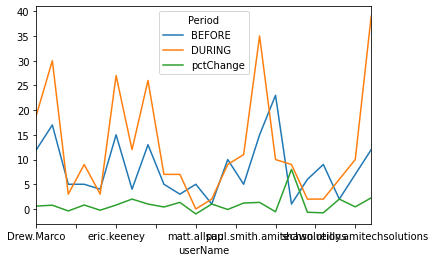

In [16]:
summary.plot.line() #line graph of all the data

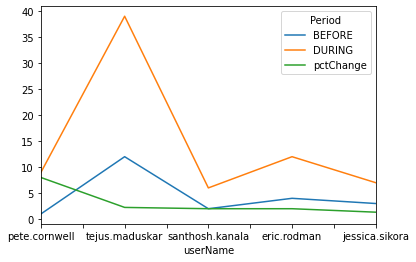

In [17]:
summary.sort_values('pctChange', ascending=False)[0:5].plot.line() #graph of the top 5 based on Percentage of change

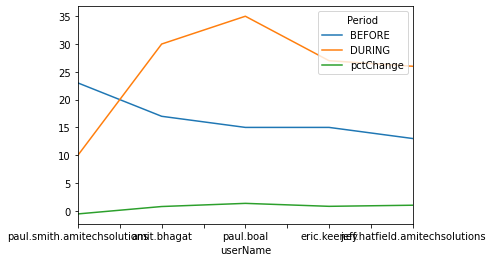

In [18]:
summary.sort_values('BEFORE', ascending=False)[0:5].plot.line() #graph of the top 5 based on the number of meetings before

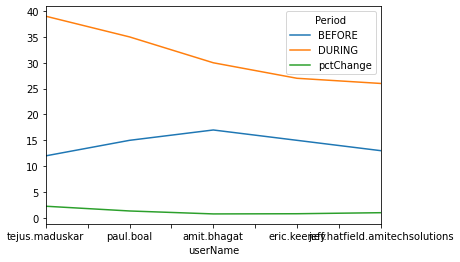

In [19]:
summary.sort_values('DURING', ascending=False)[0:5].plot.line() #graph of the top 5 based on the number of meetings after

In [20]:
display(summary.iloc[:, lambda summary: [0]].sort_values('BEFORE', ascending=False)[0:5])#list of the top 5 based on the number of meetings before
display(summary.iloc[:, lambda summary: [1]].sort_values('DURING', ascending=False)[0:5]) #list of the top 5 based on the number of meetings after
display(summary.iloc[:, lambda summary: [2]].sort_values('pctChange', ascending=False)[0:5])#list of the top 5 based on the percentage of change

Period,BEFORE
userName,
paul.smith.amitechsolutions,23.0
amit.bhagat,17.0
paul.boal,15.0
eric.keeney,15.0
jeff.hatfield.amitechsolutions,13.0


Period,DURING
userName,
tejus.maduskar,39.0
paul.boal,35.0
amit.bhagat,30.0
eric.keeney,27.0
jeff.hatfield.amitechsolutions,26.0


Period,pctChange
userName,
pete.cornwell,8.000000
tejus.maduskar,2.250000
santhosh.kanala,2.000000
eric.rodman,2.000000
jessica.sikora,1.333333


---

In [21]:
assert(len(summary) == 22)

In [22]:
assert(summary['pctChange'].mean().round(2) == 0.92)